Proyecto GRUPO 1 | Empresa Agroindustrial ASAPALSA
- Arnold Suate
- Leonel Villanueva

Importar librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones estéticas para gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')


Carga y preparacion de los data sets

In [2]:
# Cargar archivos
df_prod = pd.read_csv('Data/Produccion_Detallada.csv', sep=';', encoding='utf-8')
df_hist = pd.read_csv('Data/Historial_Proyecciones.csv', sep=';', encoding='utf-8')

# Limpiar nombres de columnas
df_prod.columns = df_prod.columns.str.strip()
df_hist.columns = df_hist.columns.str.strip()

df_prod['TipoMovimiento'] = df_prod['DESCRIPCION'].str.extract(r'\d*\s*(.*)', expand=False).str.strip().str.lower()
df_hist['TipoMovimiento'] = df_hist['DESCRIPCION'].str.extract(r'\d*\s*(.*)', expand=False).str.strip().str.lower()

# Arreglar nombres inconsistentes
df_prod['TipoMovimiento'] = df_prod['TipoMovimiento'].replace({
    'fruta recibida': 'fruta recibida',
    'fruta proyectada': 'fruta proyectada',
    'proyeccion compra de fruta ajustada': 'proyeccion ajustada'
})

df_hist['TipoMovimiento'] = df_hist['TipoMovimiento'].replace({
    'proyeccion compra de fruta ajustada': 'proyeccion ajustada'
})


Unificando estructura

In [3]:
# Mapeo de nombres de mes a número
meses_map = {
    'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04',
    'mayo': '05', 'junio': '06', 'julio': '07', 'agosto': '08',
    'septiembre': '09', 'setiembre': '09',
    'octubre': '10', 'noviembre': '11', 'diciembre': '12'
}

# Convertir nombres de mes a número
df_prod['MES'] = df_prod['MES'].str.strip().str.lower().map(meses_map)
df_hist['MES'] = df_hist['MES'].str.strip().str.lower().map(meses_map)


# Crear columna de fecha
df_prod['Fecha'] = pd.to_datetime(df_prod['year'].astype(str) + '-' + df_prod['MES'] + '-01')
df_hist['Fecha'] = pd.to_datetime(df_hist['year'].astype(str) + '-' + df_hist['MES'] + '-01')

# Seleccionar solo columnas necesarias
df_prod_clean = df_prod[['Fecha', 'TipoMovimiento', 'T.M.']]
df_hist_clean = df_hist[['Fecha', 'TipoMovimiento', 'T.M.']]


Unir datasets

In [52]:
# Asegurar que 'T.M.' sea numérico en ambos dataframes
df_prod_clean['T.M.'] = df_prod_clean['T.M.'].replace(',', '', regex=True).astype(float)
df_hist_clean['T.M.'] = df_hist_clean['T.M.'].astype(float)

# Concatenar todo
df_total = pd.concat([df_prod_clean, df_hist_clean], ignore_index=True)

# Agrupar por fecha y tipo de movimiento
df_grouped = df_total.groupby(['Fecha', 'TipoMovimiento'])['T.M.'].sum().reset_index()

# Pivotear para graficación
pivot = df_grouped.pivot(index='Fecha', columns='TipoMovimiento', values='T.M.').fillna(0)
pivot.head()


C:\Users\leocr\AppData\Local\Temp\ipykernel_9448\58691928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod_clean['T.M.'] = df_prod_clean['T.M.'].replace(',', '', regex=True).astype(float)
C:\Users\leocr\AppData\Local\Temp\ipykernel_9448\58691928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist_clean['T.M.'] = df_hist_clean['T.M.'].astype(float)


TipoMovimiento,fruta proyectada,fruta proyectada 2019,fruta proyectada 2020,fruta proyectada 2021,fruta proyectada 2022,fruta proyectada 2023,fruta proyectada 2024,fruta proyectada 2025,fruta recibida,proyeccion ajustada
Fecha,,,,,,,,,,
2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3365.65,0.0
2017-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3331.73,0.0
2017-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5231.66,0.0
2017-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5597.24,0.0
2017-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9585.13,0.0


Grafico de Evolucion de tonealadas por movimiento

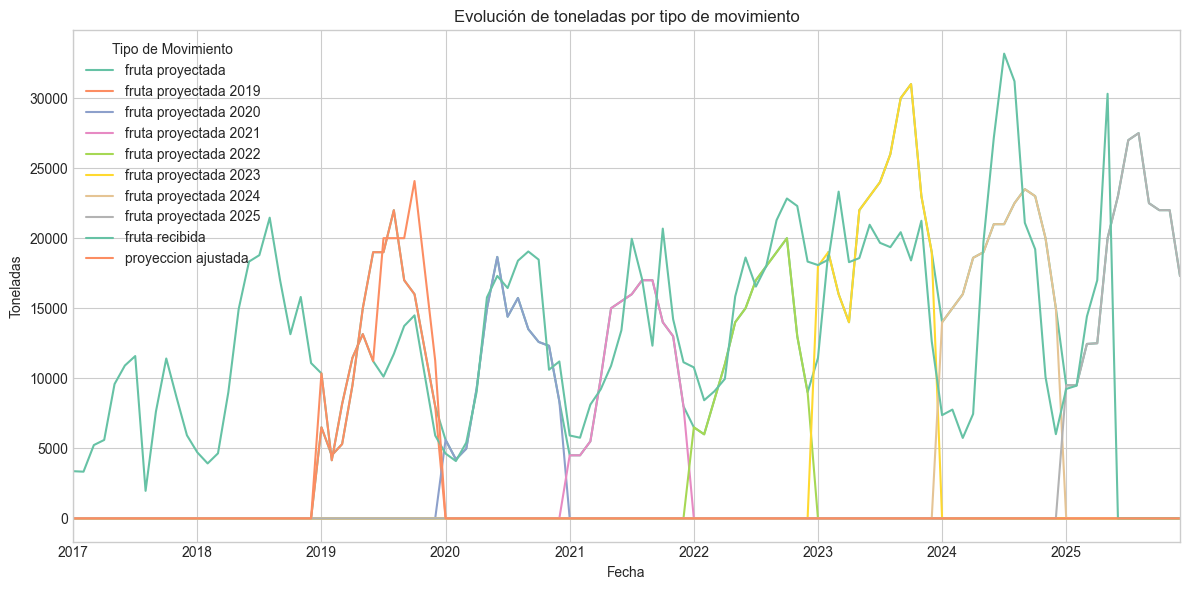

In [ ]:

pivot.plot(figsize=(12,6))
plt.title('Evolución de toneladas por tipo de movimiento')
plt.ylabel('Toneladas')
plt.xlabel('Fecha')
plt.legend(title='Tipo de Movimiento')
plt.tight_layout()
plt.show()


Grafico de Barra de Toneladas por movimiento

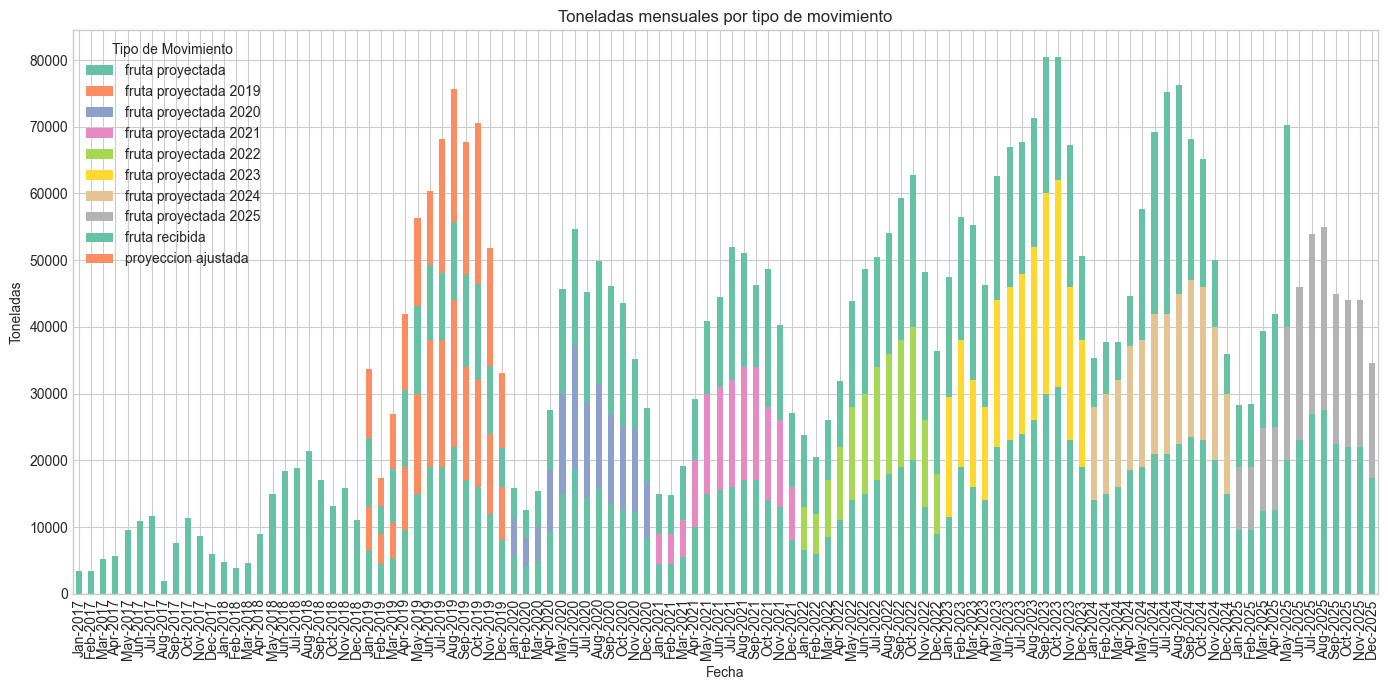

In [56]:
# Gráfico de barras apiladas
pivot.index = pivot.index.strftime('%b-%Y')

pivot.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Toneladas mensuales por tipo de movimiento')
plt.ylabel('Toneladas')
plt.xlabel('Fecha')
plt.legend(title='Tipo de Movimiento')
plt.tight_layout()
plt.show()


Comparacion de Fruta proyectada vs recibida

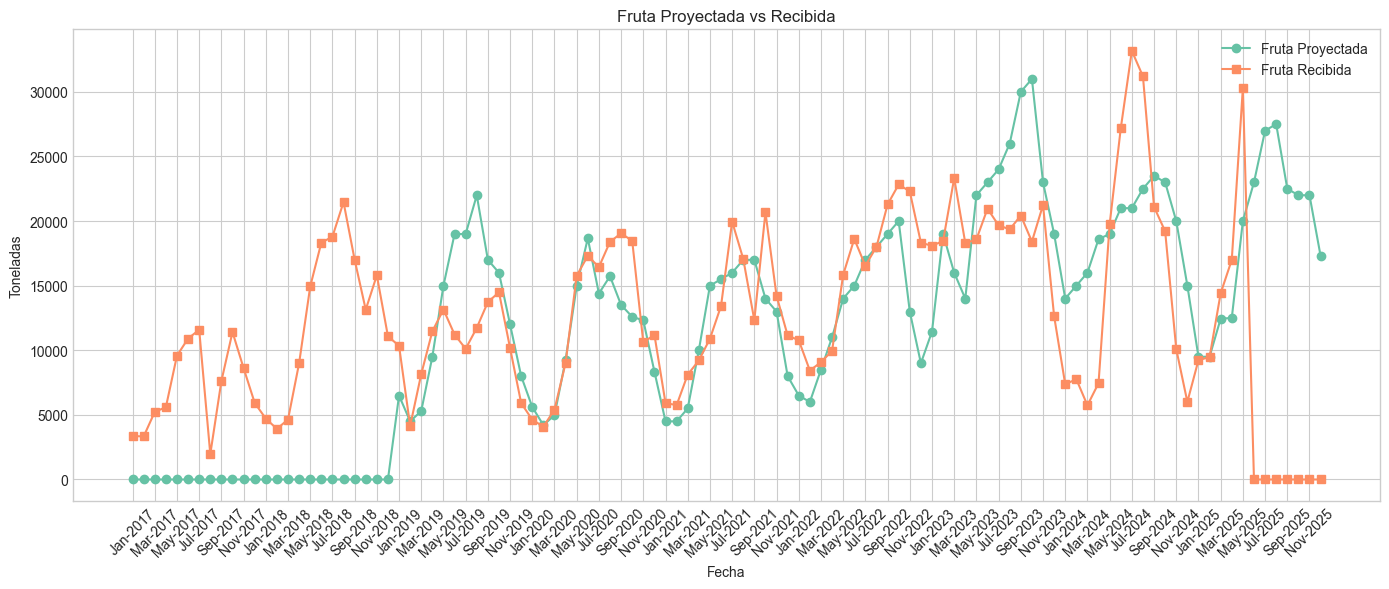

In [ ]:
labels = pivot.index

plt.figure(figsize=(14,6))
plt.plot(pivot.index, pivot.get('fruta proyectada', 0), label='Fruta Proyectada', marker='o')
plt.plot(pivot.index, pivot.get('fruta recibida', 0), label='Fruta Recibida', marker='s')

plt.title('Fruta Proyectada vs Recibida')
plt.xlabel('Fecha')
plt.ylabel('Toneladas')
plt.legend()

# Se mostrara solo una etiqueta cada 2 fechas
plt.xticks(ticks=range(0, len(labels), 2), labels=labels[::2], rotation=45)

plt.tight_layout()
plt.show()



Grafico de presicion de proyeccion ajustada

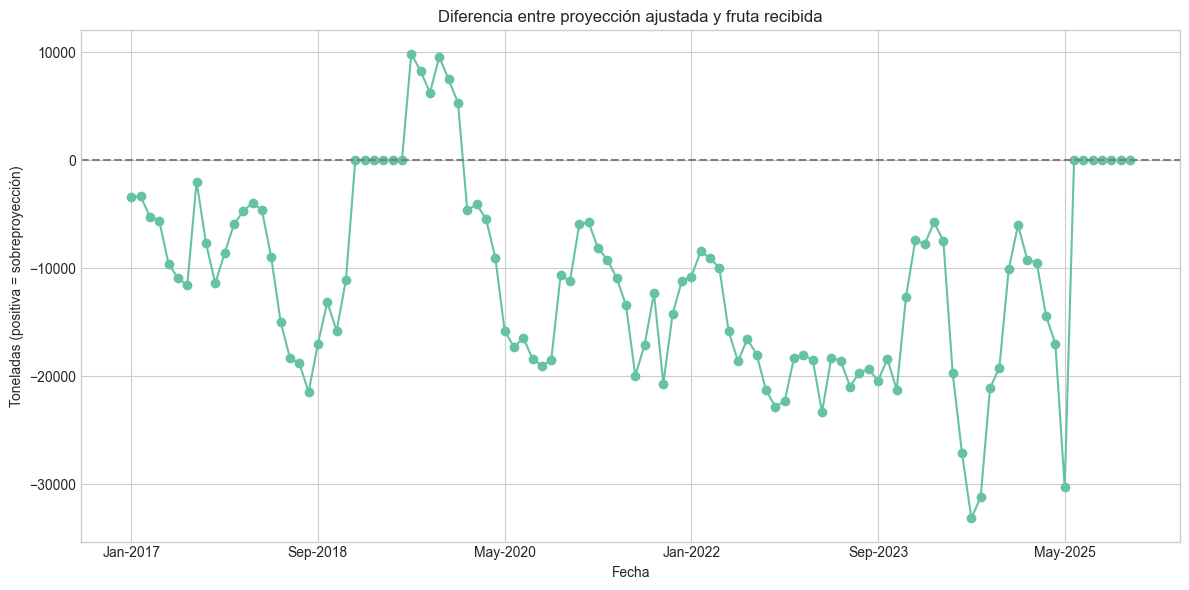

In [ ]:
# Creacion de una columna de diferencia entre fruta ajustada y recibida
pivot['diferencia_ajustada'] = pivot.get('proyeccion ajustada', 0) - pivot.get('fruta recibida', 0)

plt.figure(figsize=(12,6))
pivot['diferencia_ajustada'].plot(marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Diferencia entre proyección ajustada y fruta recibida')
plt.ylabel('Toneladas (positiva = sobreproyección)')
plt.xlabel('Fecha')
plt.tight_layout()
plt.show()


Gráfico de barras de precisión mensual (% de cumplimiento de proyección)

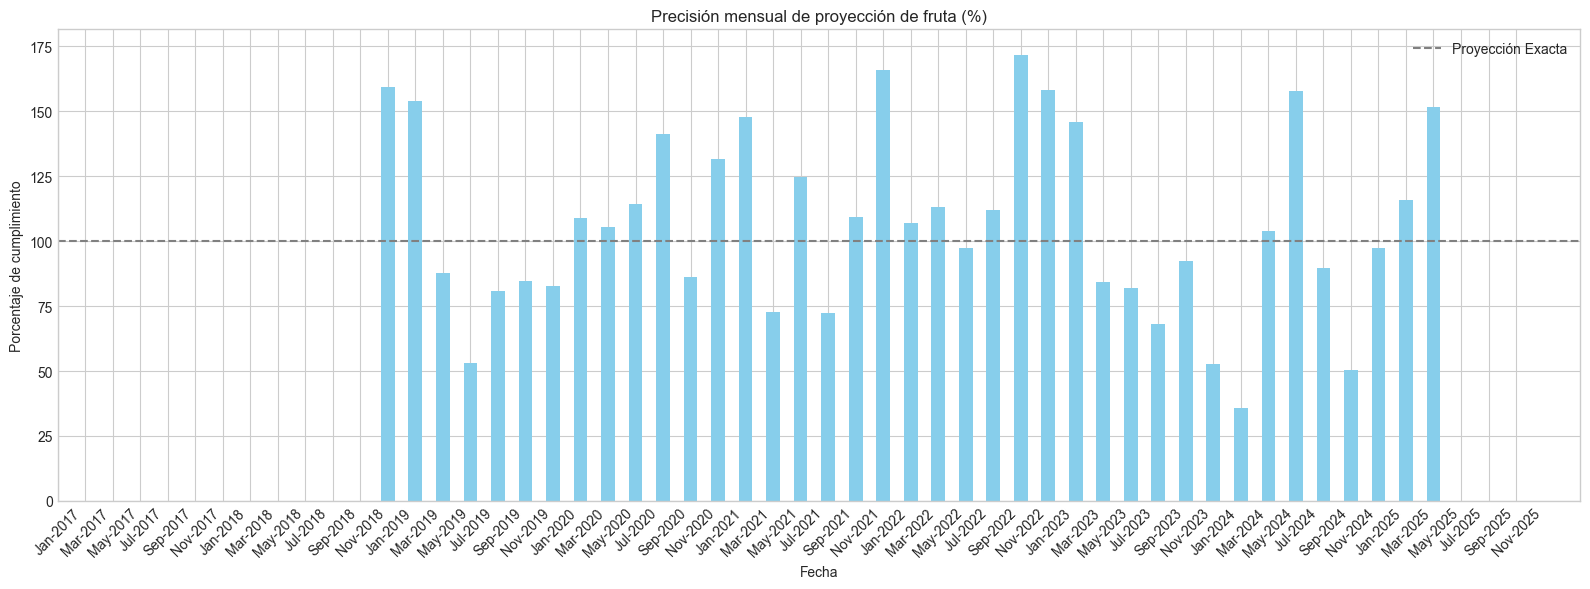

In [ ]:
import numpy as np

# Calcular precisión (% de fruta recibida vs proyectada)
pivot['precision_proy'] = (pivot.get('fruta recibida', 0) / pivot.get('fruta proyectada', 1)) * 100

pivot['precision_proy'] = pivot['precision_proy'].replace([np.inf, -np.inf], np.nan)

# Mostrar solo una etiqueta cada 1 meses
subset = pivot.iloc[::2]
subset_labels = labels[::2]

plt.figure(figsize=(16,6))
plt.bar(range(len(subset)), subset['precision_proy'], color='skyblue', width=0.5)
plt.axhline(100, color='gray', linestyle='--', label='Proyección Exacta')

# Ajustar límite del eje Y
max_y = np.nanmax(subset['precision_proy'])
plt.ylim(0, max(120, max_y + 10 if not np.isnan(max_y) else 120))

# Eje X separado
plt.xticks(ticks=range(len(subset)), labels=subset_labels, rotation=45)

plt.title('Precisión mensual de proyección de fruta (%)')
plt.ylabel('Porcentaje de cumplimiento')
plt.xlabel('Fecha')
plt.legend()
plt.tight_layout()
plt.show()
